## Import libs

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.pipeline import make_pipeline
import os

## Polynomial Regression (Multivariate)

#### Section 1

##### Define Array

In [39]:
arr = np.array([[0, 1],
                [2, 3],
                [4, 5]])

arr.shape

(3, 2)

##### Define & fit Poly with d=2

In [40]:
poly = PolynomialFeatures(degree=2)
poly_arr = poly.fit_transform(arr)
poly_arr

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [41]:
poly = PolynomialFeatures(degree=2)
poly.fit(arr)
poly_arr = poly.transform(arr)
poly_arr

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

##### Define & fit Poly when "interaction_only=True"

در این حالت فقط توان 1 پارامترها و ترکیبات آنها استفاده میشود. و توانهای 2 و 3 و بالاتر یک پارامتر به تنهایی در خروجی ظاهر نمی شود.

In [42]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_arr = poly.fit_transform(arr)
poly_arr

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

#### Section 2

##### Load Data

In [43]:

notebook_path = os.getcwd()
# Datasets path
# auto
csv_train_path = f"{notebook_path}/data/train_advertising_data.csv"
csv_test_path = f"{notebook_path}/data/test_advertising_data.csv"

In [44]:
train_set = pd.read_csv(csv_train_path)
train = np.array(train_set)[:, 1:]
x_train = train[:, :3]
y_train = train[:, 3]
x_train.shape, y_train.shape

((160, 3), (160,))

In [45]:
test_set = pd.read_csv(csv_test_path)
test = np.array(test_set)[:, 1:]
x_test = test[:, :3]
y_test = test[:, 3]
x_test.shape, y_test.shape

((40, 3), (40,))

##### Visiualize

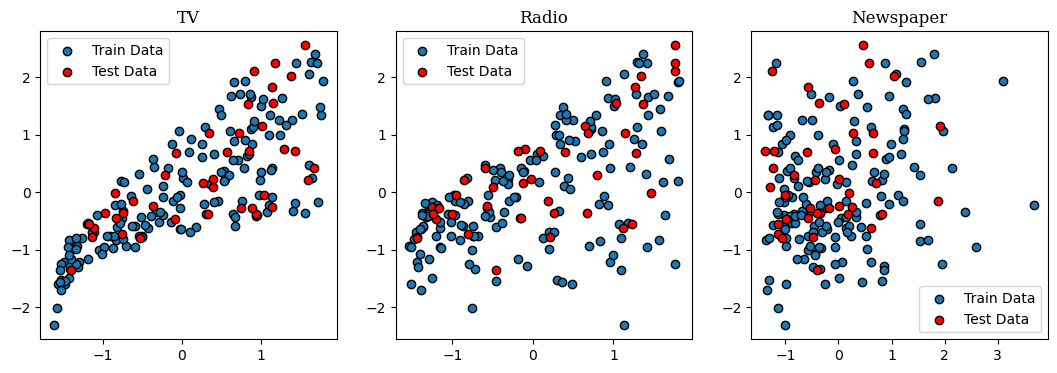

In [46]:
fig, axe = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
flat_ax = axe.flatten()

columns = train_set.columns[1:]
for i in range(x_train.shape[1]):
  flat_ax[i].scatter(x_train[:, i], y_train, ec='k', label='Train Data')
  flat_ax[i].scatter(x_test[:, i], y_test, ec='k', color='r', label='Test Data')
  flat_ax[i].set_title(f'{columns[i]}', fontfamily='Serif')
  flat_ax[i].legend()

##### LinearRegression for Poly with d=[1, 2, 3, 7]

In [47]:
dictionary = {'num_in_features':[],
              'Polynomial_degree':[],
              'num_out_features':[],
              'train_score':[],
              'test_score':[]}

for d in [1, 2, 3, 7]:
  poly = PolynomialFeatures(degree=d)
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.transform(x_test)

  dictionary['num_in_features'].append(x_train.shape[1])
  dictionary['Polynomial_degree'].append(d)
  dictionary['num_out_features'].append(x_train_poly.shape[1])

  model = LinearRegression()
  model.fit(x_train_poly, y_train)
  train_score = model.score(x_train_poly, y_train)
  test_score  = model.score(x_test_poly, y_test)

  dictionary['train_score'].append(train_score)
  dictionary['test_score'].append(test_score)

In [48]:
result_df = pd.DataFrame(dictionary)
result_df

,num_in_features,Polynomial_degree,num_out_features,train_score,test_score
0,3,1,4,0.891167,0.908577
1,3,2,10,0.985502,0.988475
2,3,3,20,0.991279,0.994160
3,3,7,120,0.995829,0.610901


##### train and test score plots

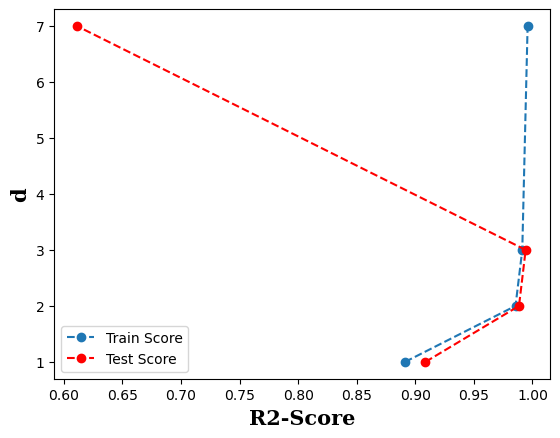

In [49]:
plt.plot(result_df['train_score'], result_df['Polynomial_degree'], '--o', label='Train Score')
plt.plot(result_df['test_score'], result_df['Polynomial_degree'], '--ro', label='Test Score')
plt.xlabel('R2-Score', fontfamily='Serif', fontweight='bold', fontsize=15)
plt.ylabel('d', fontfamily='Serif', fontweight='bold', fontsize=15)
plt.legend();

##### Train best Model with make_pipeline

In [50]:
pipeline_model = make_pipeline(PolynomialFeatures(3),
                               LinearRegression())
pipeline_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [51]:
pipeline_model.fit(x_train, y_train)
pipeline_model.score(x_train, y_train), pipeline_model.score(x_test, y_test)

(0.9912788695274679, 0.9941604724573837)